# Multiple Linear Regression(MLR) with scikit-learn

### using more than 1 predictor or more features?

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [46]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)


In [47]:

df = pd.read_csv('weekall_during.csv')
df.head(10)
#df.info()
#df.columns
#df.drop(['Location'], axis=1, inplace=True )
#df.head()


,Date,Time,Count,Status,Sensor,Type,Position,Location,Location Code
0,4/29/2019,0:09:03,0,0,UP,Counter A,4,H2-L3,H2-L3
1,4/29/2019,0:19:03,0,0,UP,Counter A,4,H2-L3,H2-L3
2,4/29/2019,0:29:03,0,0,UP,Counter A,4,H2-L3,H2-L3
3,4/29/2019,0:39:03,0,0,UP,Counter A,4,H2-L3,H2-L3
4,4/29/2019,0:49:03,0,0,UP,Counter A,4,H2-L3,H2-L3
5,4/29/2019,0:59:03,0,0,UP,Counter A,4,H2-L3,H2-L3
6,4/29/2019,1:09:03,0,0,UP,Counter A,4,H2-L3,H2-L3
7,4/29/2019,1:19:03,0,0,UP,Counter A,4,H2-L3,H2-L3
8,4/29/2019,1:29:03,0,0,UP,Counter A,4,H2-L3,H2-L3
9,4/29/2019,1:39:03,0,0,UP,Counter A,4,H2-L3,H2-L3


## Relationship between features and responses

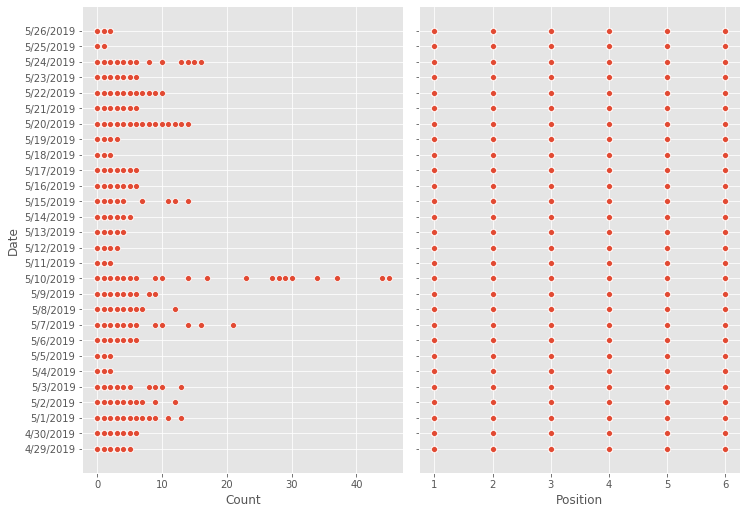

In [48]:
sns.pairplot(df, x_vars=['Count', 'Position'], y_vars='Date', height=7, aspect=0.7)

## MLR: Estimating Coefficients

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
from pandas import DataFrame, Series

df['Date'] = pd.to_datetime(df['Date']) 
x = df[['Count', 'Position']]

y = df.Date



lm1 = LinearRegression()
lm1.fit(x,y)
print(lm1.intercept_)
print(lm1.coef_)

1.5576306270597025e+18
[-2.63749355e+13 -9.34852737e+11]


In [51]:
list(zip(['Count', 'Position' , 'Date'], lm1.coef_))

[('Count', -26374935465724.316), ('Position', -934852737066.3342)]

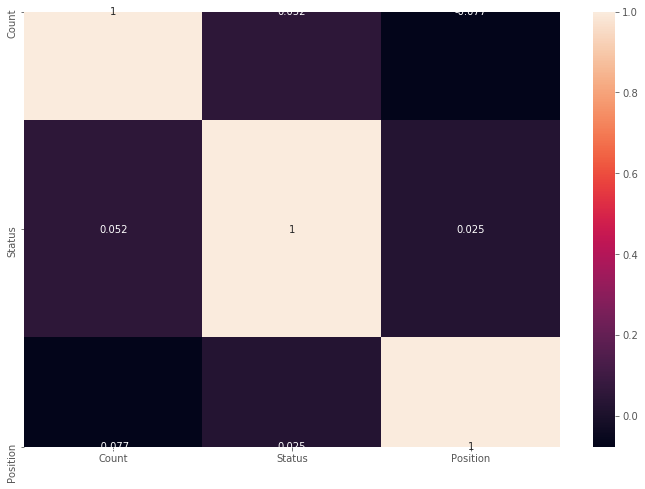

In [52]:
sns.heatmap(df.corr(), annot=True)

# Feature Selection

In [53]:
from sklearn.metrics import r2_score
lm2 = LinearRegression().fit(x[['Count' , 'Position']], y)
lm2_preds = lm2.predict(x[['Count' , 'Position']])
print("R*2:", r2_score(y, lm2_preds))

TypeError: ufunc subtract cannot use operands with types dtype('<M8[ns]') and dtype('float64')

# Model Evaluation Using Train/Test Split and Metrics

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x = df([['Count', 'Date']])
y = df.Position

x_train, x_test, y_test, y_train = train_test_split(x,y, random_state=1)

lm4 = LinearRegression().fit(x_train, y_train)
lm4_pred = lm4.predict(x_test)

print("R^2: ", r2_score(y_test, lm4_pred))
#print("RMSE:" np.sqrt(mean_squared_error(y_test, lm4_pred)))

TypeError: 'DataFrame' object is not callable

In [67]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

Visualizer = PredictionError(lm4).fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()

NameError: name 'lm4' is not defined

# Intraction Effect